#Decision Tree without sklearn

##Importing Libraries and data


In [ ]:
import pandas as pd
import numpy as np
import math
from itertools import combinations

## Secundary Functions 

### def impurity


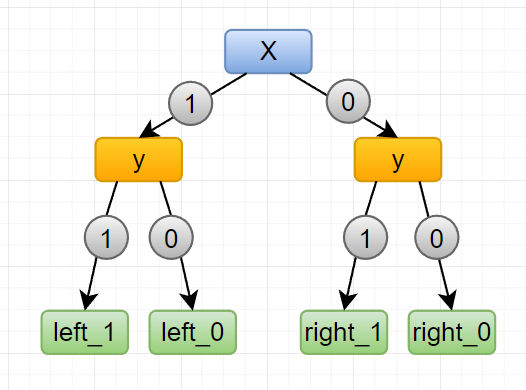

In [ ]:
# caculating impurity
def impurity(left_1, left_0, right_1, right_0):

  #left
  try:
    a = (left_1/(left_1+left_0))**2
  except:
    a = 0
  try:
    b = (left_0/(left_1+left_0))**2
  except:
    b = 0
  impurity_left = 1 -a -b

  # right
  try:
    a = (right_1/(right_1+right_0))**2
  except:
    a = 0
  try:
    b = (right_0/(right_1+right_0))**2
  except:
    b = 0
  impurity_right = 1 -a -b

  # average
  try:
    a = impurity_left*(left_0+left_1)/(left_0+left_1+right_0+right_1)
  except:
    a = 0
  try:
    b = impurity_right*(right_0+right_1)/(left_0+left_1+right_0+right_1)
  except:
    b = 0
  impurity_average = a + b

  return impurity_average

### For Binary independent variables 

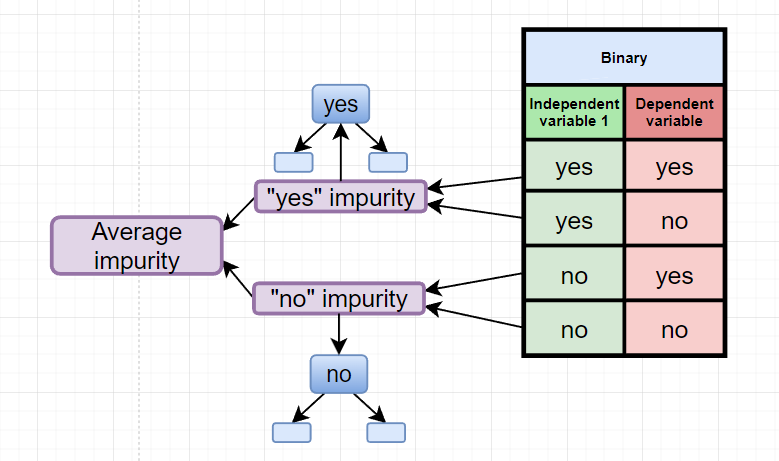

In [ ]:
# calculating impurity
def gini_binary(X,y,index_to_use):
  X_temp = X.copy()
  y_temp = y.copy()
  uniques_values_list = set(X_temp)
  uniques_values_list = list(uniques_values_list)
  uniques_values_list.sort()
  uniques_values_list_y = set(y_temp)
  uniques_values_list_y = list(uniques_values_list_y)
  uniques_values_list_y.sort()

  # variables
  left_0 = 0
  left_1 = 0
  right_0 = 0
  right_1 = 0
  index = 0
  index_left = []
  index_right = []

  # adding to variables
  for i in range(len(X)):
    if i in index_to_use:
      if (X[i]==uniques_values_list[0]) & (y_temp[i]==uniques_values_list_y[0]):
        right_0 += 1 
        index_right.append(index)
      elif (X[i]==uniques_values_list[0]) & (y_temp[i]==uniques_values_list_y[1]):
        right_1 += 1 
        index_right.append(index)

      if len(uniques_values_list) >=2:
        if (X[i]==uniques_values_list[1]) & (y_temp[i]==uniques_values_list_y[0]):
          left_0 += 1 
          index_left.append(index)
        elif (X[i]==uniques_values_list[1]) & (y_temp[i]==uniques_values_list_y[1]):
          left_1 += 1 
          index_left.append(index)
    index +=1
  if len(uniques_values_list) ==1:
    uniques_values_list[1]=None

  return [impurity(left_1, left_0, right_1, right_0),(uniques_values_list[1],uniques_values_list[0]),(index_left,index_right),(left_1, left_0, right_1, right_0)]

### For Ordinal as int independent variables with only sucessor eg. 0,1,2,3,4

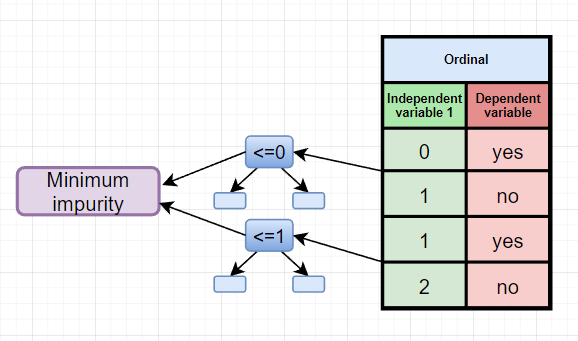

In [ ]:
def gini_ordinal(X,y,index_to_use):
  
  X_temp = X.copy()
  y_temp = y.copy()
  uniques_values_list = set(X_temp)
  uniques_values_list = list(uniques_values_list)
  uniques_values_list.sort()
  uniques_values_list_y = set(y_temp)
  uniques_values_list_y = list(uniques_values_list_y)
  uniques_values_list_y.sort()
 
  impurity_dict = {}

  for x in range(len(uniques_values_list[:-1])):
    left_0 = 0
    left_1 = 0
    right_0 = 0
    right_1 = 0
    index = 0
    index_left = []
    index_right = []
    # adding to variables
    for i in range(len(X)):
      if i in index_to_use:
        if (X[i] > uniques_values_list[x]) & (y_temp[i]==uniques_values_list_y[0]):
          right_0 += 1 
          index_right.append(index)
        elif (X[i] > uniques_values_list[x]) & (y_temp[i]==uniques_values_list_y[1]):
          right_1 += 1 
          index_right.append(index)
        elif (X[i]<=uniques_values_list[x]) & (y_temp[i]==uniques_values_list_y[0]):
          left_0 += 1 
          index_left.append(index)
        elif (X[i]<=uniques_values_list[x]) & (y_temp[i]==uniques_values_list_y[1]):
          left_1 += 1 
          index_left.append(index)
      index +=1
    impurity_dict[x] = [left_1, left_0, right_1, right_0,['<=', uniques_values_list[x]],['>',uniques_values_list[x]],index_left,index_right]

  # selecting the minimum impurity
  minimum_impurity = 2
  key_selected = 0
  for k,v in impurity_dict.items():
    temp_impurity = impurity(v[0], v[1], v[2], v[3])
    if temp_impurity<minimum_impurity:
      minimum_impurity = temp_impurity
      key_selected = k


  return [minimum_impurity,(impurity_dict[key_selected][4],impurity_dict[key_selected][5]),(impurity_dict[key_selected][6],impurity_dict[key_selected][7]),
          (impurity_dict[key_selected][0],impurity_dict[key_selected][1],impurity_dict[key_selected][2],impurity_dict[key_selected][3])]

### For Discrete independent variables

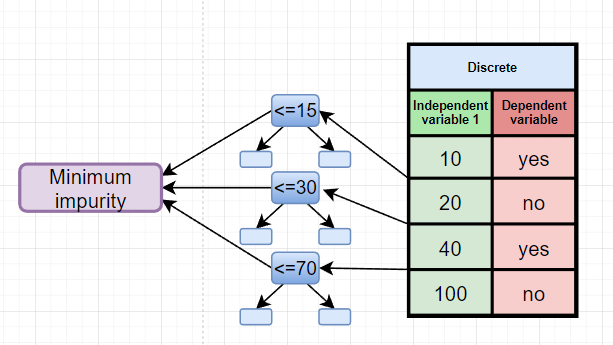

In [ ]:
#same as continuous
def gini_discrete(X,y,index_to_use):
  return gini_continuous(X,y,index_to_use)


###For Categorical (Nominal or Ordinal as string) independent variables

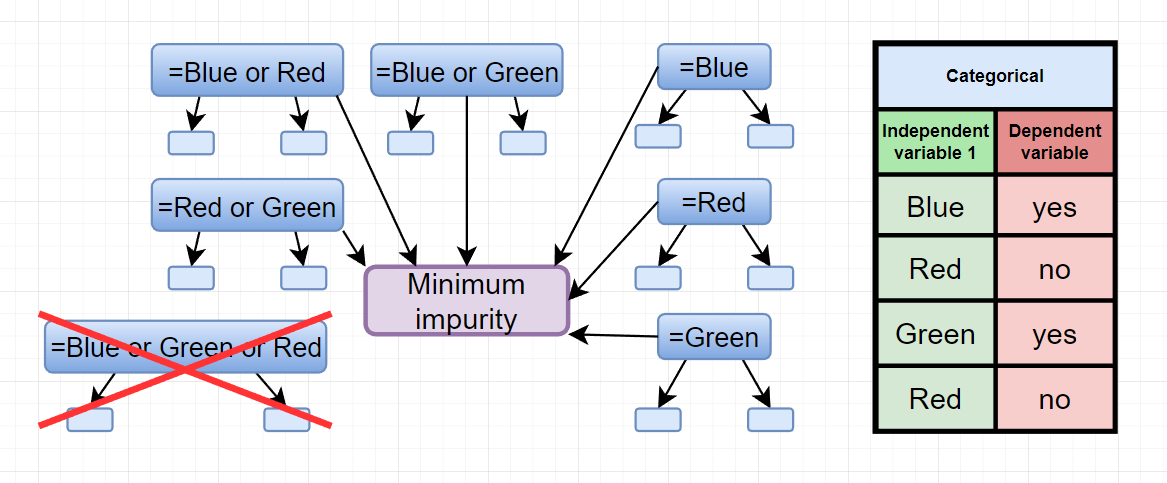

In [ ]:
def gini_categorical(X,y,index_to_use):

  X_temp = X.copy()
  y_temp = y.copy()
  uniques_values_list = set(X_temp)
  uniques_values_list = list(uniques_values_list)
  uniques_values_list.sort()
  uniques_values_list_y = set(y_temp)
  uniques_values_list_y = list(uniques_values_list_y)
  uniques_values_list_y.sort()

  impurity_combination_condition_list=[]
  for i in range(len(uniques_values_list)):
    if i != 0:
      comb = list(combinations(uniques_values_list,i))
      for x in comb:
        impurity_combination_condition_list.append(x)

  impurity_dict = {}
  for x in range(len(impurity_combination_condition_list)):
    left_0 = 0
    left_1 = 0
    right_0 = 0
    right_1 = 0
    index = 0
    index_left = []
    index_right = []
    # adding to variables
    for i in range(len(X)):
      if i in index_to_use:
        if (X[i] not in impurity_combination_condition_list[x]) & (y_temp[i]==uniques_values_list_y[0]):
          right_0 += 1 
          index_right.append(index)
        elif (X[i] not in impurity_combination_condition_list[x]) & (y_temp[i]==uniques_values_list_y[1]):
          right_1 += 1 
          index_right.append(index)
        elif (X[i]in impurity_combination_condition_list[x]) & (y_temp[i]==uniques_values_list_y[0]):
          left_0 += 1 
          index_left.append(index)
        elif (X[i]in impurity_combination_condition_list[x]) & (y_temp[i]==uniques_values_list_y[1]):
          left_1 += 1 
          index_left.append(index)
      index +=1
    impurity_dict[x] = [left_1, left_0, right_1,right_0 , ['in', impurity_combination_condition_list[x]],['not in', impurity_combination_condition_list[x]],index_left,index_right]

  # selecting the minimum impurity
  minimum_impurity = 10
  key_selected = 0
  for k,v in impurity_dict.items():
    temp_impurity = impurity(v[0], v[1], v[2], v[3])
    if temp_impurity<minimum_impurity:
      minimum_impurity = temp_impurity
      key_selected = k


  return [minimum_impurity, (impurity_dict[key_selected][4],impurity_dict[key_selected][5]),(impurity_dict[key_selected][6],impurity_dict[key_selected][7]),
          (impurity_dict[key_selected][0],impurity_dict[key_selected][1],impurity_dict[key_selected][2],impurity_dict[key_selected][3])]


###For Continuous independent variables

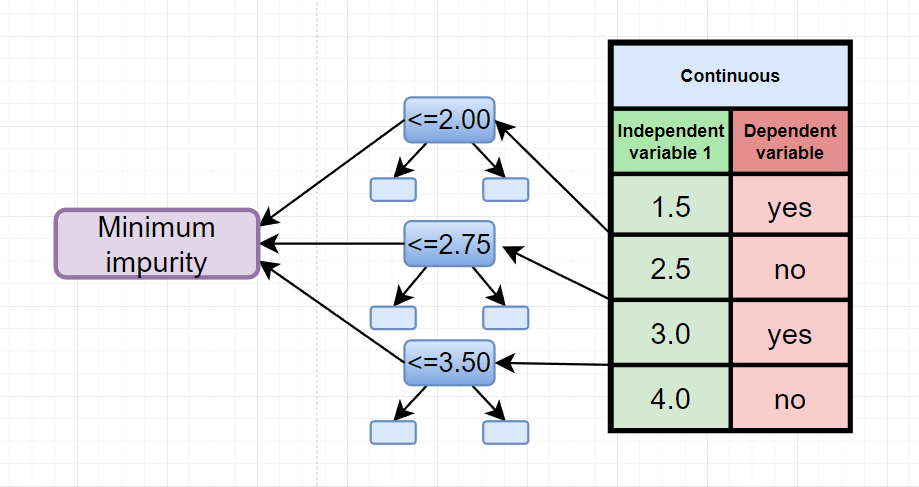

In [ ]:
#same as discrete
def gini_continuous(X,y,index_to_use):
  
  X_temp = X.copy()
  y_temp = y.copy()
  uniques_values_list = set(X_temp)
  uniques_values_list = list(uniques_values_list)
  uniques_values_list.sort()
  uniques_values_list_y = set(y_temp)
  uniques_values_list_y = list(uniques_values_list_y)
  uniques_values_list_y.sort()

  impurity_middle_condition_list=[]
  for i in range(len(uniques_values_list[:-1])):
    impurity_middle_condition_list.append( (uniques_values_list[i] +uniques_values_list[i+1])/2)
  
  impurity_dict = {}
  for x in range(len(impurity_middle_condition_list)):
    left_0 = 0
    left_1 = 0
    right_0 = 0
    right_1 = 0
    index = 0
    index_left = []
    index_right = []
    # adding to variables
    for i in range(len(X)):
      if i in index_to_use:
        if (X[i] > impurity_middle_condition_list[x]) & (y_temp[i]==uniques_values_list_y[0]):
          right_0 += 1 
          index_right.append(index)
        elif (X[i] > impurity_middle_condition_list[x]) & (y_temp[i]==uniques_values_list_y[1]):
          right_1 += 1 
          index_right.append(index)
        elif (X[i]<=impurity_middle_condition_list[x]) & (y_temp[i]==uniques_values_list_y[0]):
          left_0 += 1 
          index_left.append(index)
        elif (X[i]<=impurity_middle_condition_list[x]) & (y_temp[i]==uniques_values_list_y[1]):
          left_1 += 1 
          index_left.append(index)
      index +=1
    impurity_dict[x] = [left_1, left_0, right_1, right_0, ['<=',impurity_middle_condition_list[x]],['>',impurity_middle_condition_list[x]],index_left,index_right]

  # selecting the minimum impurity
  minimum_impurity = 2
  key_selected = 0
  for k,v in impurity_dict.items():
    temp_impurity = impurity(v[0], v[1], v[2], v[3])
    if temp_impurity<minimum_impurity:
      minimum_impurity = temp_impurity
      key_selected = k


  return [minimum_impurity, (impurity_dict[key_selected][4],impurity_dict[key_selected][5]),(impurity_dict[key_selected][6],impurity_dict[key_selected][7]),
          (impurity_dict[key_selected][0],impurity_dict[key_selected][1],impurity_dict[key_selected][2],impurity_dict[key_selected][3])]

## Main Functions

### def func_tree

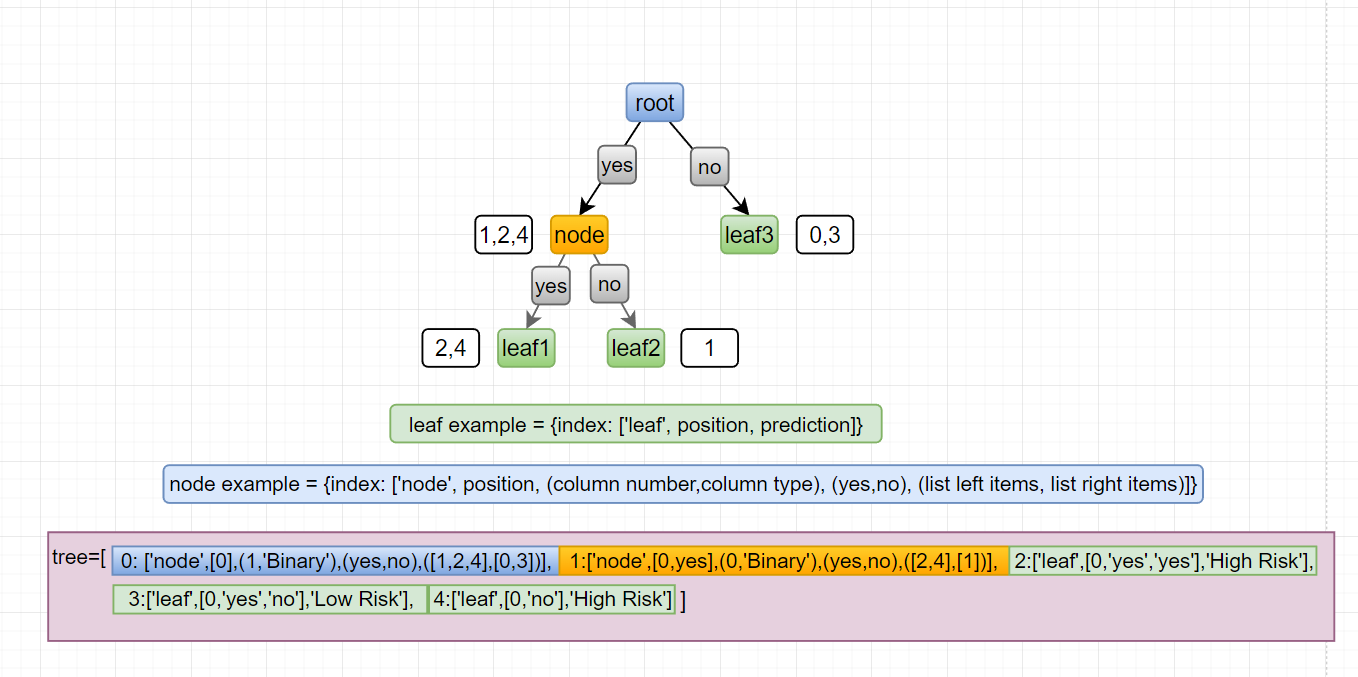

In [ ]:
def func_tree(tree,type_X_y_dict,position,index_to_use,max_depth,min_sample):

  #copying for not change with append
  type_X_y_dict_to_use = type_X_y_dict.copy()
  index_to_use_temp = index_to_use.copy()

  impurity_dict = {}  # key = column number : values = [impurity(left_1, left_0, right_1, right_0),(uniques_values_list[1],uniques_values_list[0]),(index_left,index_right) ,(left_1, left_0, right_1, right_0)]
  column_type = []
  for k,v in type_X_y_dict_to_use.items():
    
    if v[0] == 'Binary':
      impurity_dict[k] = gini_binary(v[1],v[2],index_to_use)
      column_type.append('Binary')
    elif v[0] == 'Ordinal':
      impurity_dict[k] = gini_ordinal(v[1],v[2],index_to_use)
      column_type.append('Ordinal')
    elif v[0] == 'Discrete':
      impurity_dict[k] = gini_discrete(v[1],v[2],index_to_use)
      column_type.append('Discrete')
    elif v[0] == 'Categorical':
      impurity_dict[k] = gini_categorical(v[1],v[2],index_to_use)
      column_type.append('Categorical')
    elif v[0] == 'Continuous':
      impurity_dict[k] = gini_continuous(v[1],v[2],index_to_use)
      column_type.append('Continuous')
    else:
      column_type = 'Error'
      print('Error: column_type not found')

  column_type_temp = column_type.copy()
  # searching for minimum impurity
  column_min = 0
  impurity_min = 100
  for k,v in impurity_dict.items():
    if v[0] < impurity_min:
      column_min = k
      impurity_min = v[0]

  independent_variable = type_X_y_dict[0][2].copy()
  impurity_dict_temp = impurity_dict.copy()
  gini_impurity = impurity_dict_temp[column_min][0]
  left_branch_condition, right_branch_condition = impurity_dict_temp[column_min][1][0],impurity_dict_temp[column_min][1][1]
  left_branch_array, right_branch_array = impurity_dict_temp[column_min][2][0],impurity_dict_temp[column_min][2][1]
  left_1, left_0, right_1, right_0 = impurity_dict_temp[column_min][3][0],impurity_dict_temp[column_min][3][1],impurity_dict_temp[column_min][3][2],impurity_dict_temp[column_min][3][3]
  
  instance_position0 = position.copy()
  instance_position1 = position.copy()
  instance_position2 = position.copy()

  size = len(tree)
  tree[size] = ['node',instance_position0,(column_min,column_type_temp[column_min]),(left_branch_condition,right_branch_condition),(left_branch_array,right_branch_array)]
  size = len(tree)

  left_side_leaf_condition = ( len(left_branch_array) <= min_sample) or (len(instance_position1) >= max_depth) or (left_1 == 0 or left_0 == 0 ) or (len(left_branch_array)==0) 
  right_side_leaf_condition =( len(right_branch_array) <= min_sample) or (len(instance_position2) >= max_depth ) or (right_1 == 0 or right_1 == 0 ) or (len(right_branch_array)==0)
  
  y_temp = independent_variable.copy()
  uniques_values_list_y = set(y_temp)
  uniques_values_list_y = list(uniques_values_list_y)
  uniques_values_list_y.sort()

  # left side
  if left_side_leaf_condition:
    #left leaf
    size = len(tree)
    instance_position1.append(left_branch_condition)
    if left_1 > left_0:
      tree[size] = ['leaf',instance_position1 ,uniques_values_list_y[1]]
    elif left_1 < left_0:
      tree[size] = ['leaf',instance_position1 ,uniques_values_list_y[0]]
    else:
      tree[size] = ['leaf',instance_position1 ,uniques_values_list_y[1]]

  else:
    # left node
    instance_position1.append(left_branch_condition)
    func_tree(tree,type_X_y_dict,instance_position1,index_to_use = left_branch_array,max_depth=max_depth,min_sample=min_sample) 
  
  # right side
  if right_side_leaf_condition:

    # right leaf
    size = len(tree)
    instance_position2.append(right_branch_condition)
    if right_1 > right_0:
      tree[size] = ['leaf',instance_position2 ,uniques_values_list_y[1]]
    elif right_1 < right_0:
      tree[size] = ['leaf',instance_position2 ,uniques_values_list_y[0]]
    else:
      tree[size] = ['leaf',instance_position2 ,uniques_values_list_y[1]]

  else:
    # right node
    instance_position2.append(right_branch_condition)
    func_tree(tree,type_X_y_dict,instance_position2,index_to_use =right_branch_array,max_depth=max_depth,min_sample=min_sample) 

    

  #print('impurity:',impurity_dict.items())
  #print('root', column_min, impurity_min)
  #print('tree', tree)


### def DecisionTreeClassification

In [ ]:
def DecisionTreeClassification(X,y,max_depth=20,min_sample=3):
 
  # if data in numpy format, convert for normal format
  if type (X)== np.ndarray:
    X = np.ndarray.tolist(X)

  type_X_y_dict = {} # key = column number, values = [type,X,y]
  
  #1° time defining the type of column
  for col in range(len(X[0])):
    
    # checking list type
    y_temp = list(y)
    #X_temp = list(X[:,col])

    X_temp = []
    for x in range(len(X)):
      X_temp.append(X[x][col])

    temp_list_int = [ type(x) == int for x in X_temp]
    temp_list_str = [ type(x) == str for x in X_temp]
    temp_list_float_or_int = [ (type(x)==float or type(x)==int) for x in X_temp]

    uniques_values = set(X_temp)
    uniques_values_sorted = sorted(uniques_values)
    # checking for ordinal
    if all(temp_list_int):
      is_all_sucessor = []
      for x in range(len(uniques_values_sorted[:-1])):
          is_all_sucessor.append(uniques_values_sorted[x+1]-uniques_values_sorted[x]==1)

    # if Binary
    if len(uniques_values_sorted) ==2 or len(uniques_values_sorted) ==1: 
      type_X_y_dict[col] = ['Binary',X_temp,y_temp]
    # if Ordinal
    elif all(temp_list_int) and all(is_all_sucessor):
      type_X_y_dict[col] = ['Ordinal',X_temp,y_temp]
    # if Discrete
    elif all(temp_list_int) :
      type_X_y_dict[col] = ['Discrete',X_temp,y_temp]
    # if Categorical
    elif all(temp_list_str):
      type_X_y_dict[col] = ['Categorical',X_temp,y_temp]
    # if Continuous
    elif all(temp_list_float_or_int ):
      type_X_y_dict[col] = ['Continuous',X_temp,y_temp]
    # error
    else:
      print('Error: column number:', col , ' does not have uniform data')

  # 2° creating the tree

  tree = {}
  array_index_to_use=[]
 
  for x in range(len(X)):
    array_index_to_use.append(x)
    
  func_tree(tree,type_X_y_dict,position=[0],index_to_use=array_index_to_use ,max_depth = max_depth,min_sample=min_sample) 

  return tree


### def predict

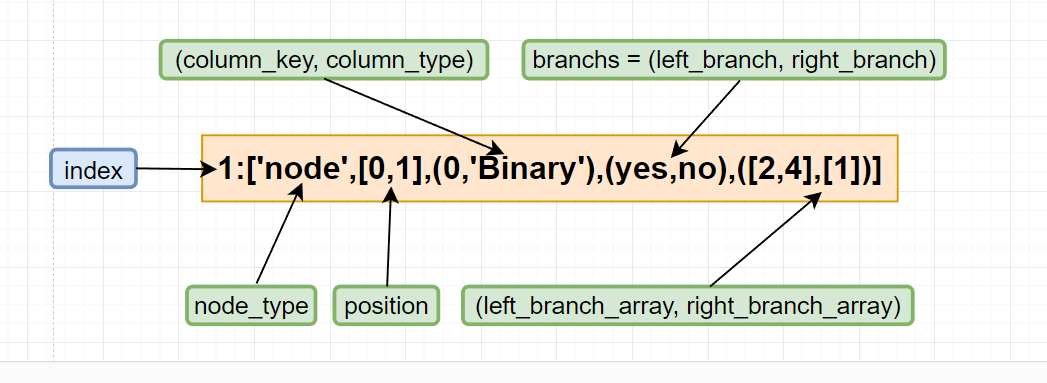

In [ ]:

def predict(X,tree,verbose = False):


  predictions_list = []
  for n in range(len(X)):


    the_element_to_be_predict = X[n]
    index = 0
    stay_while = True

    if verbose == True:
      print()
      print('the_element_to_be_predict number:',n)
      print('the_element_to_be_predict number:',the_element_to_be_predict)


    while stay_while:

      if verbose == True:
        print()
        print('index',index)

      node_type = tree[index][0]
      position = tree[index][1]

      if node_type=='leaf':
        stay_while = False
        prediction_on_this_leaf = tree[index][2]
        predictions_list.append(prediction_on_this_leaf)

      elif node_type=='node':

        column_key = tree[index][2][0]
        column_type = tree[index][2][1]
        branchs = tree[index][3]
        left_branch = tree[index][3][0]
        right_branch = tree[index][3][1]
        left_branch_array = tree[index][4][0]
        right_branch_array = tree[index][4][1]
        new_branch = None
        new_position = None

        if column_type =='Binary':
          
          # select the condition eg: 0,1 or yes or no
          for i in range(len(branchs)):
            if the_element_to_be_predict[column_key] == branchs[i]:
              new_branch = branchs[i]
          # position to search
          new_position = position.copy()
          new_position.append(new_branch)
          
          # searching for a new key on dict tree
          for i in range(len(tree)):
            if tree[i][1] == new_position:
              index = i
              break

        elif column_type =='Ordinal':

          ordinal_branch = branchs
          ordinal_branch_left_symbol = ordinal_branch[0][0]
          ordinal_branch_right_symbol = ordinal_branch[1][0]
          ordinal_branch_number = ordinal_branch[0][1]

          # select the condition eg: 0,1 or yes or no
          if the_element_to_be_predict[column_key] <= ordinal_branch_number:
            new_branch = left_branch
          else:
            new_branch = right_branch

          # position to search
          new_position = position.copy()
          new_position.append(new_branch)          

          # searching for a new key on dict tree
          for i in range(len(tree)):
            if tree[i][1] == new_position:
              index = i
              break

          if verbose == True:
            print('ordinal_branch_number',ordinal_branch_number)

        elif (column_type =='Continuous') or (column_type =='Discrete'):
          
          continuous_branch = branchs
          continuous_branch_left_symbol = continuous_branch[0][0]
          continuous_branch_right_symbol = continuous_branch[1][0]
          continuous_branch_number = continuous_branch[0][1]

          # select the condition eg: 0,1 or yes or no
          if the_element_to_be_predict[column_key] <= continuous_branch_number:
            new_branch = left_branch
          else:
            new_branch = right_branch

          # position to search
          new_position = position.copy()
          new_position.append(new_branch)          

          # searching for a new key on dict tree
          for i in range(len(tree)):
            if tree[i][1] == new_position:
              index = i
              break

          if verbose == True:
            print('continuous_branch_number',continuous_branch_number)

        elif column_type =='Categorical':
          
          categorical_branch = branchs
          categorical_branch_left_symbol = categorical_branch[0][0]
          categorical_branch_right_symbol = categorical_branch[1][0]
          categorical_branch_string = categorical_branch[0][1]
     
          # select the condition eg: 0,1 or yes or no
          if the_element_to_be_predict[column_key] in categorical_branch_string:
            new_branch = left_branch
          else:
            new_branch = right_branch

          # position to search
          new_position = position.copy()
          new_position.append(new_branch)          

          # searching for a new key on dict tree
          for i in range(len(tree)):
            if tree[i][1] == new_position:
              index = i
              break
          if verbose == True:
            print('categorical_branch_string',categorical_branch_string)

        else:
          print('Error: column_type not found')
          
        if verbose == True:
          print('node_type',node_type)
          print('position' ,position)
          print('column_key' ,column_key)
          print('column_type' ,column_type)
          print('branchs' ,branchs)
          print('left_branch',left_branch) 
          print('right_branch' ,right_branch)
          print('left_branch_array',left_branch_array) 
          print('right_branch_array' ,right_branch_array)
          print('new_branch' ,new_branch)
          print('new_position' ,new_position)






  return predictions_list


# Predicting with small samples

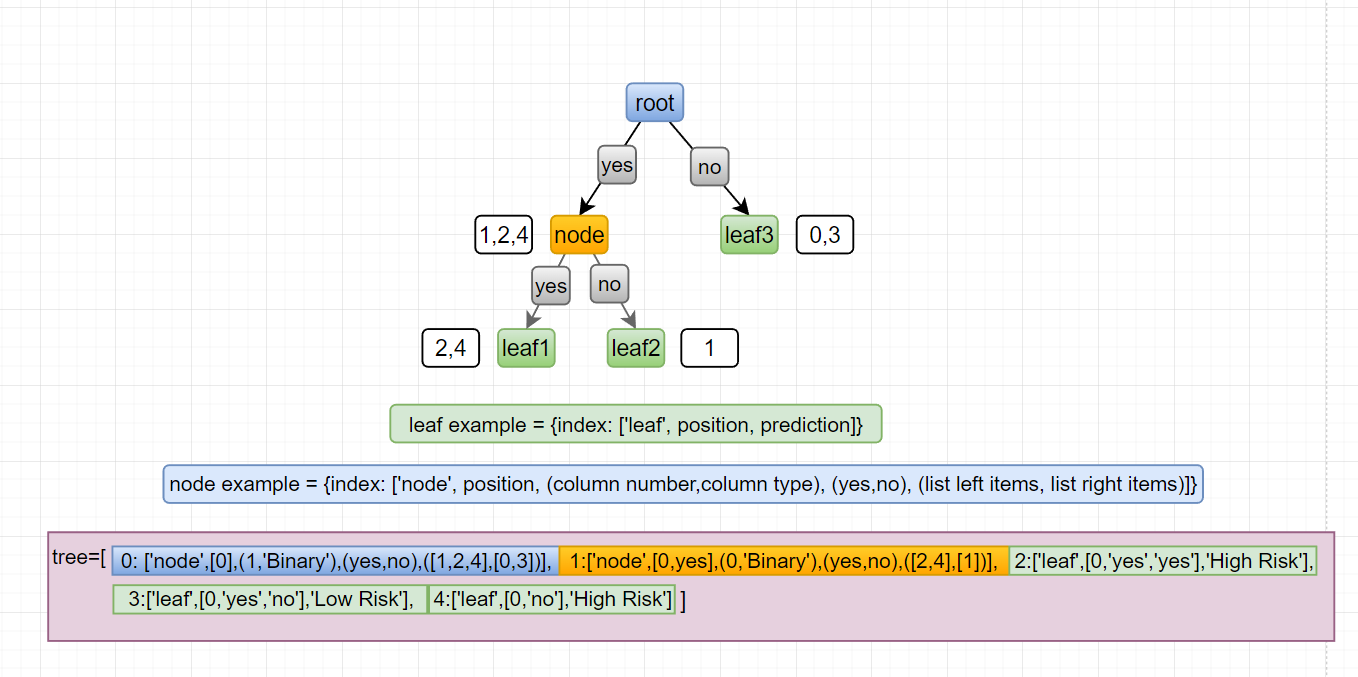

## Predict with: Binary, simple

In [ ]:
data_dict = {'Binary':[1,1,0,0],'Dependent Variable': [0,1,0,1]}
data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
tree = DecisionTreeClassification(X,y)

for k,v in tree.items():
  print(k,v)
  
X= [[1]] 
y = predict(X,tree,verbose= True)
print('Prediction:', y)


0 ['node', [0], (0, 'Binary'), (1, 0), ([0, 1], [2, 3])]
1 ['leaf', [0, 1], 1]
2 ['leaf', [0, 0], 1]

the_element_to_be_predict number: 0
the_element_to_be_predict number: [1]

index 0
node_type node
position [0]
column_key 0
column_type Binary
branchs (1, 0)
left_branch 1
right_branch 0
left_branch_array [0, 1]
right_branch_array [2, 3]
new_branch 1
new_position [0, 1]

index 1
Prediction: [1]


## Predict with: Binary, bigger data to predict

In [ ]:
data_dict = {'Binary':[1,0,0,0,1,1,1,0,0,1],'Binary2':[0,0,1,0,1,1,0,0,0,1],'Binary3':[1,1,0,1,0,1,0,0,1,0],'Dependent Variable': [1,1,0,1,0,0,1,0,0,0]}
data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
tree = DecisionTreeClassification(X,y)

for k,v in tree.items():
  print(k,v)
  
X= [[1,1,1],[1,0,0],[1,0,1],[0,1,1],[0,0,0]] 
y = predict(X,tree,verbose= False)
print('Prediction:', y)


0 ['node', [0], (1, 'Binary'), (1, 0), ([2, 4, 5, 9], [0, 1, 3, 6, 7, 8])]
1 ['leaf', [0, 1], 0]
2 ['node', [0, 0], (0, 'Binary'), (1, 0), ([0, 6], [1, 3, 7, 8])]
3 ['leaf', [0, 0, 1], 1]
4 ['node', [0, 0, 0], (2, 'Binary'), (1, 0), ([1, 3, 8], [7])]
5 ['leaf', [0, 0, 0, 1], 1]
6 ['leaf', [0, 0, 0, 0], 0]
Prediction: [0, 1, 1, 0, 0]


## Predict with: Binary, bigger data to input

In [ ]:
data_dict = {'Binary':[1,0,0,0,1,1,1,0,0,1],'Binary2':[0,0,1,0,1,1,0,0,0,1],'Binary3':[1,1,0,1,0,1,0,0,1,0],'Dependent Variable': [1,1,0,1,0,0,1,0,0,0]}
data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
tree = DecisionTreeClassification(X,y)

for k,v in tree.items():
  print(k,v)
  
X= [[1,1,1]] 
y = predict(X,tree,verbose= False)
print('Prediction:', y)


0 ['node', [0], (1, 'Binary'), (1, 0), ([2, 4, 5, 9], [0, 1, 3, 6, 7, 8])]
1 ['leaf', [0, 1], 0]
2 ['node', [0, 0], (0, 'Binary'), (1, 0), ([0, 6], [1, 3, 7, 8])]
3 ['leaf', [0, 0, 1], 1]
4 ['node', [0, 0, 0], (2, 'Binary'), (1, 0), ([1, 3, 8], [7])]
5 ['leaf', [0, 0, 0, 1], 1]
6 ['leaf', [0, 0, 0, 0], 0]
Prediction: [0]


In [ ]:
import random
random.seed(0)
randomlist = []
for x in range(11):
  temp_list =[]
  for i in range(0,100):
    n = random.randint(0,1)
    temp_list.append(n)
  randomlist.append(temp_list)
data_dict =  {'Binary':randomlist[0],'Binary2':randomlist[1],'Binary3':randomlist[2],'Binary4':randomlist[3],'Binary5':randomlist[4],'Binary6':randomlist[5],'Dependent Variable':randomlist[6]}
data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
tree = DecisionTreeClassification(X,y)

for k,v in tree.items():
  print(k,v)
  
X= [randomlist[7],randomlist[8],randomlist[9],randomlist[10]] 
y = predict(X,tree,verbose= False)
print('Prediction:', y)


0 ['node', [0], (4, 'Binary'), (1, 0), ([0, 5, 6, 9, 10, 12, 15, 16, 18, 19, 20, 23, 28, 30, 32, 33, 36, 37, 39, 41, 42, 46, 47, 48, 50, 51, 55, 56, 61, 62, 65, 66, 69, 72, 75, 76, 77, 79, 80, 81, 83, 86, 88, 89, 93], [1, 2, 3, 4, 7, 8, 11, 13, 14, 17, 21, 22, 24, 25, 26, 27, 29, 31, 34, 35, 38, 40, 43, 44, 45, 49, 52, 53, 54, 57, 58, 59, 60, 63, 64, 67, 68, 70, 71, 73, 74, 78, 82, 84, 85, 87, 90, 91, 92, 94, 95, 96, 97, 98, 99])]
1 ['node', [0, 1], (0, 'Binary'), (1, 0), ([0, 5, 6, 16, 19, 20, 23, 28, 32, 37, 46, 47, 50, 55, 65, 66, 77, 79, 80, 81, 83, 86, 93], [9, 10, 12, 15, 18, 30, 33, 36, 39, 41, 42, 48, 51, 56, 61, 62, 69, 72, 75, 76, 88, 89])]
2 ['node', [0, 1, 1], (5, 'Binary'), (1, 0), ([16, 19, 20, 46, 50, 65, 79, 80, 83, 93], [0, 5, 6, 23, 28, 32, 37, 47, 55, 66, 77, 81, 86])]
3 ['node', [0, 1, 1, 1], (1, 'Binary'), (1, 0), ([16, 20, 50, 65, 80, 93], [19, 46, 79, 83])]
4 ['node', [0, 1, 1, 1, 1], (0, 'Binary'), (1, 0), ([16, 20, 50, 65, 80, 93], [])]
5 ['node', [0, 1, 1, 1, 

## Predict with: Binary, string

In [ ]:
data_dict = {'Binary':['yes','no','no','no','yes','yes','yes','no','no','yes'],'Binary2':['no','no','yes','no','yes','yes','no','no','no','yes'],
             'Binary3':['yes','yes','no','yes','no','yes','no','no','yes','no'],'Dependent Variable': ['yes','yes','no','yes','no','no','yes','no','no','no']}
data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
tree = DecisionTreeClassification(X,y)

for k,v in tree.items():
  print(k,v)
  
X= [['yes','yes','yes'],['yes','yes','yes']]
y = predict(X,tree,verbose= False)
print('Prediction:', y)


0 ['node', [0], (1, 'Binary'), ('yes', 'no'), ([2, 4, 5, 9], [0, 1, 3, 6, 7, 8])]
1 ['leaf', [0, 'yes'], 'no']
2 ['node', [0, 'no'], (0, 'Binary'), ('yes', 'no'), ([0, 6], [1, 3, 7, 8])]
3 ['leaf', [0, 'no', 'yes'], 'yes']
4 ['node', [0, 'no', 'no'], (2, 'Binary'), ('yes', 'no'), ([1, 3, 8], [7])]
5 ['leaf', [0, 'no', 'no', 'yes'], 'yes']
6 ['leaf', [0, 'no', 'no', 'no'], 'no']
Prediction: ['no', 'no']


## Predict with: Ordinal

In [ ]:

data_dict = {'Ordinal':[3,4,1,2,2,2,3,4,3,1],'Ordinal1':[4,4,1,2,2,2,3,4,3,1],'Dependent Variable': [1,1,0,1,0,0,1,0,0,0]}

data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
tree = DecisionTreeClassification(X,y)

for k,v in tree.items():
  print(k,v)

X= [[2,3,'a']]
y = predict(X,tree,verbose= False)
print('Prediction:', y)


0 ['node', [0], (0, 'Ordinal'), (['<=', 2], ['>', 2]), ([2, 3, 4, 5, 9], [0, 1, 6, 7, 8])]
1 ['node', [0, ['<=', 2]], (0, 'Ordinal'), (['<=', 1], ['>', 1]), ([2, 9], [3, 4, 5])]
2 ['leaf', [0, ['<=', 2], ['<=', 1]], 0]
3 ['leaf', [0, ['<=', 2], ['>', 1]], 0]
4 ['node', [0, ['>', 2]], (0, 'Ordinal'), (['<=', 3], ['>', 3]), ([0, 6, 8], [1, 7])]
5 ['leaf', [0, ['>', 2], ['<=', 3]], 1]
6 ['leaf', [0, ['>', 2], ['>', 3]], 1]
Prediction: [0]


## Predict with: Discrete

In [ ]:
data_dict = {'Discrete':[-3,6,5,-5,0,4,5,1,3,3],'Dependent Variable': [1,1,0,1,0,0,1,0,0,0]}

data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
tree = DecisionTreeClassification(X,y)

for k,v in tree.items():
  print(k,v)
  
X= [[2]]
y = predict(X,tree,verbose= False)
print('Prediction:', y)


0 ['node', [0], (0, 'Discrete'), (['<=', -1.5], ['>', -1.5]), ([0, 3], [1, 2, 4, 5, 6, 7, 8, 9])]
1 ['leaf', [0, ['<=', -1.5]], 1]
2 ['node', [0, ['>', -1.5]], (0, 'Discrete'), (['<=', 4.5], ['>', 4.5]), ([4, 5, 7, 8, 9], [1, 2, 6])]
3 ['leaf', [0, ['>', -1.5], ['<=', 4.5]], 0]
4 ['leaf', [0, ['>', -1.5], ['>', 4.5]], 1]
Prediction: [0]


## Predict with: Categorical

In [ ]:
data_dict = {'Categorical ':['a','b','c','d','d','a','a','c','b','b'],'Dependent Variable': [1,1,0,1,0,0,1,0,0,0]}

data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
tree = DecisionTreeClassification(X,y)

for k,v in tree.items():
  print(k,v)
  
X= [['a']]
y = predict(X,tree,verbose= False)
print('Prediction:', y)

0 ['node', [0], (0, 'Categorical'), (['in', ('a', 'd')], ['not in', ('a', 'd')]), ([0, 3, 4, 5, 6], [1, 2, 7, 8, 9])]
1 ['node', [0, ['in', ('a', 'd')]], (0, 'Categorical'), (['in', ('a',)], ['not in', ('a',)]), ([0, 5, 6], [3, 4])]
2 ['leaf', [0, ['in', ('a', 'd')], ['in', ('a',)]], 1]
3 ['leaf', [0, ['in', ('a', 'd')], ['not in', ('a',)]], 1]
4 ['node', [0, ['not in', ('a', 'd')]], (0, 'Categorical'), (['in', ('b',)], ['not in', ('b',)]), ([1, 8, 9], [2, 7])]
5 ['leaf', [0, ['not in', ('a', 'd')], ['in', ('b',)]], 0]
6 ['leaf', [0, ['not in', ('a', 'd')], ['not in', ('b',)]], 0]
Prediction: [1]


## Predict with: Continuous

In [ ]:

data_dict = {'Continuous ':[1,-0.344,0.11,0.77,1.23,-1.111,1.785,0.2346,0.111,1.999],'Dependent Variable': [1,1,0,1,0,0,1,0,0,0]}

data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
tree = DecisionTreeClassification(X,y)

for k,v in tree.items():
  print(k,v)
  
X= [[0.5]]
y = predict(X,tree,verbose= False)
print('Prediction:', y)


0 ['node', [0], (0, 'Continuous'), (['<=', 0.5023], ['>', 0.5023]), ([1, 2, 5, 7, 8], [0, 3, 4, 6, 9])]
1 ['node', [0, ['<=', 0.5023]], (0, 'Continuous'), (['<=', -0.11699999999999999], ['>', -0.11699999999999999]), ([1, 5], [2, 7, 8])]
2 ['leaf', [0, ['<=', 0.5023], ['<=', -0.11699999999999999]], 1]
3 ['leaf', [0, ['<=', 0.5023], ['>', -0.11699999999999999]], 0]
4 ['node', [0, ['>', 0.5023]], (0, 'Continuous'), (['<=', 1.115], ['>', 1.115]), ([0, 3], [4, 6, 9])]
5 ['leaf', [0, ['>', 0.5023], ['<=', 1.115]], 1]
6 ['leaf', [0, ['>', 0.5023], ['>', 1.115]], 0]
Prediction: [0]


##Predict with: Binary and Ordinal, Discrete, Categorical and Continuous




In [ ]:

data_dict = {'Binary':[1,0,0,0,1,1,1,0,0,1],'Binary2':[0,0,1,0,1,1,0,0,0,1],'Binary3':[1,1,0,1,0,1,0,0,1,0],'Ordinal':[10,11,12,13,14,11,11,12,14,10],'Discrete':[-3,6,5,-5,0,4,5,1,3,3],'Categorical':['a','b','c','d','d','a','a','c','b','b'],
             'Continuous':[1,-0.344,0.11,0.77,1.23,-1.111,1.785,0.2346,0.111,1.999],'Dependent Variable': [1,1,0,1,0,0,1,0,0,0]}

data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
tree = DecisionTreeClassification(X,y)

for k,v in tree.items():
  print(k,v)
  
X= [[1,0,1,11,3,'a',0.3]]
y = predict(X,tree,verbose= False)
print('Prediction:', y)


0 ['node', [0], (1, 'Binary'), (1, 0), ([2, 4, 5, 9], [0, 1, 3, 6, 7, 8])]
1 ['leaf', [0, 1], 0]
2 ['node', [0, 0], (3, 'Ordinal'), (['<=', 11], ['>', 11]), ([0, 1, 6], [3, 7, 8])]
3 ['leaf', [0, 0, ['<=', 11]], 1]
4 ['leaf', [0, 0, ['>', 11]], 0]
Prediction: [1]


# Predicting with Titanic data

Data

In [ ]:
data_raw=pd.read_csv('/content/data_for_survived.csv',index_col=0)
data = data_raw.copy()
data.dropna(inplace=True)
X = data.drop(["Name","Survived"],axis=1).values
y = data.iloc[:, -2].values

Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


Scalling

In [ ]:
'''
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,:-10] = sc.fit_transform(X_train[:,:-10]) #slicing the dummy variable
X_test[:,:-10] = sc.transform(X_test[:,:-10])
'''

'\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train[:,:-10] = sc.fit_transform(X_train[:,:-10]) #slicing the dummy variable\nX_test[:,:-10] = sc.transform(X_test[:,:-10])\n'

Model

In [ ]:
tree = DecisionTreeClassification(X_train,y_train,max_depth= 7,min_sample = 20)

Tree

In [ ]:
for k,v in tree.items():
  print(k,v)
  

0 ['node', [0], (14, 'Binary'), (1.0, 0.0), ([1, 2, 3, 4, 5, 6, 8, 9, 12, 15, 16, 17, 19, 20, 21, 23, 25, 26, 28, 30, 31, 35, 36, 37, 41, 44, 46, 47, 49, 50, 51, 55, 56, 60, 61, 63, 64, 68, 69, 71, 72, 73, 74, 78, 80, 81, 82, 83, 84, 85, 86, 88, 89, 92, 95, 96, 97, 98, 101, 103, 105, 106, 107, 109, 110, 111, 112, 116, 117, 118, 119, 120, 122, 123, 125, 127, 130, 131, 134, 135, 136, 137, 138, 140, 141, 145, 146, 147, 148, 149, 150, 152, 154, 155, 156, 157, 158, 160, 161, 162, 163, 165, 166, 168, 169, 170, 173, 174, 176, 179, 188, 189, 191, 196, 197, 198, 200, 202, 204, 205, 206, 207, 208, 211, 214, 215, 216, 218, 220, 221, 223, 225, 227, 230, 231, 232, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 247, 249, 250, 252, 255, 256, 259, 260, 261, 264, 265, 266, 267, 268, 269, 270, 272, 275, 276, 277, 279, 281, 282, 283, 284, 288, 289, 293, 295, 296, 298, 299, 300, 301, 302, 305, 306, 308, 312, 313, 314, 316, 317, 318, 319, 320, 324, 326, 327, 329, 331, 332, 333, 334, 336, 337, 

Single prediction

In [ ]:
person= [[34,3,0,0,512.3292,0,1,0,0,1,0,0,0,0,0]]
y = predict(person,tree,verbose= False)
print('Prediction:', y)

Prediction: [1.0]


Full prediction

In [ ]:
prediction = predict(X_test,tree,verbose= False)
prediction

[0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, prediction)
print('Confusion matrix: ')
print(cm)

print(f'True Positive:{cm[1][1]}  True Negative:{cm[0][0]}  False Positive:{cm[0][1]}  False Negative:{cm[1][0]}')

right = cm[1][1]+cm[0][0]
wrong = cm[1][0]+cm[0][1]
print(f'Predict right: {right} - Predict wrong: {wrong}')

acc = accuracy_score(y_test, prediction)
print('Accurate: ',acc)


Confusion matrix: 
[[97 13]
 [19 50]]
True Positive:50  True Negative:97  False Positive:13  False Negative:19
Predict right: 147 - Predict wrong: 32
Accurate:  0.8212290502793296
